In [23]:
pip install fasttext

In [24]:
#import necessary libraries
import fasttext
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
#defining a function for preprocessing the texts
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Removing punctuation and numbers
    text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [26]:
df=pd.read_csv("twitter_training.csv") #reading the dataset

In [27]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


#Column name is lacking

In [28]:
df.columns=['id','platform','sentiment','text']

In [29]:
df.info() #basic information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74681 non-null  int64 
 1   platform   74681 non-null  object
 2   sentiment  74681 non-null  object
 3   text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [30]:
df.drop(['id','platform'],axis=1,inplace=True) #dropping unnecessary columns

In [31]:
df.isnull().sum() #missing values

sentiment      0
text         686
dtype: int64

In [32]:
df.dropna(inplace=True) #dropping since the main texts are missing

In [33]:
df.duplicated().sum() #duplicates

4227

In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df['sentiment'].value_counts()

Negative      21237
Positive      19137
Neutral       17110
Irrelevant    12284
Name: sentiment, dtype: int64

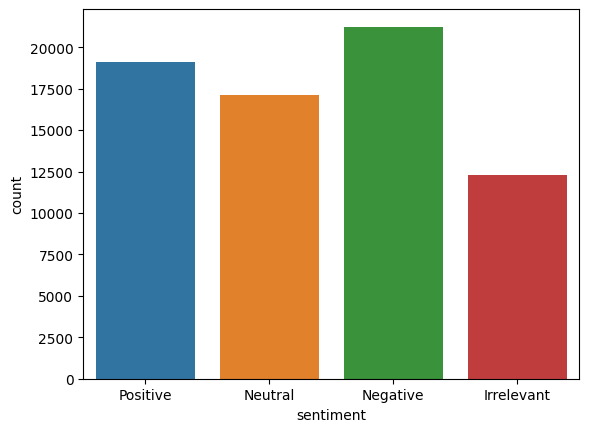

In [36]:
sns.countplot(x='sentiment', data=df)
plt.show()

In [37]:
df.sentiment = df.sentiment.map({"Neutral":0, "Irrelevant":0 ,"Positive":1,"Negative":2}) #mapping the sentiments

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

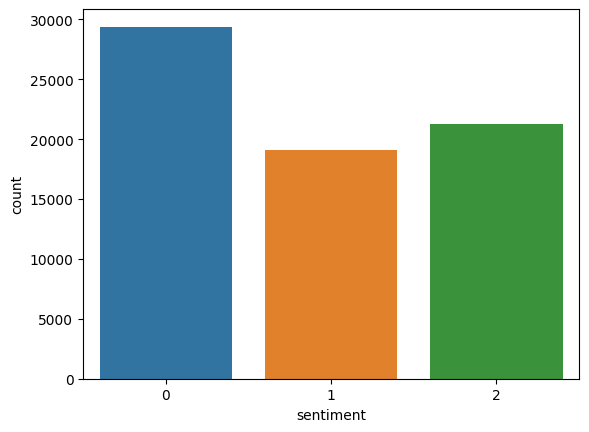

In [39]:
sns.countplot(x='sentiment', data=df)
plt.show()

Data Imbalance can be found

In [40]:
# converting to list
texts = df['text'].tolist()
labels = df['sentiment'].tolist()

In [41]:
import nltk

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
preprocessed_texts = [preprocess_text(text) for text in texts] #preprocessing using function

In [43]:
# Create a FastText-compatible training file
with open('sentiment_train.txt', 'w', encoding='utf-8') as f:
    for text, label in zip(preprocessed_texts, labels):
        f.write(f'__label__{label} {text}\n')

In [44]:
x_train,x_test,y_train,y_test= train_test_split(preprocessed_texts, labels, test_size=0.25, random_state=42)

In [45]:
# Create a FastText-compatible training file for the split dataset
with open('sentiment_train_split.txt', 'w', encoding='utf-8') as f:
    for text, label in zip(x_train, y_train):
        f.write(f'__label__{label} {text}\n')

In [47]:
# Train a FastText model
model = fasttext.train_supervised('sentiment_train_split.txt', epoch=50)

In [48]:
with open('sentiment_test_split.txt', 'w', encoding='utf-8') as f:
    for text, label in zip(x_test, y_test):
        f.write(f'__label__{label} {text}\n')

In [49]:
model.test('sentiment_test_split.txt')

(17442, 0.8466918931315216, 0.8466918931315216)

The model is having an Accuracy of 84.6 and Precision of 84.6

In [55]:
model.predict("so good of you")  #label 1 is positive

(('__label__1',), array([0.72477871]))

In [57]:
model.predict("bad")

(('__label__2',), array([0.96957946]))